<a href="https://colab.research.google.com/github/viffsi/Office_supply/blob/master/delivery_fees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import import import

In [0]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
#%matplotlib inline

import warnings

In [0]:
df_jul2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/jul2019.xls')
df_apr2020 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/apr2020.xls')
df_jan2020 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/jan2020.xls')
df_aug2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/aug2019.xls')
df_sep2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/sep2019.xls')
df_oct2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/oct2019.xls')
df_nov2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/nov2019.xls')
df_dec2019 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/dec2019.xls')
df_feb2020 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/feb2020.xls')
df_mar2020 = pd.read_excel (r'/content/drive/My Drive/salesByMonth/mar2020.xls')

In [0]:
#month = ['jul2019','apr2020','jan2020','aug2019','sep2019','oct2019','nov2020','dec2019','feb2019','mar2019']
#for s in month:
#  df_

In [348]:
df_mar2020.head()

,序号,公司编号,客户新代码,客户名称,所属国家,收货地址,收货国家,运营模式,订单号,发货仓库,出库单号,发货时间,商品ID,存货ID,虚拟ID,电源线,los,供应商,CG号,中文名称,货物名称,规格型号,产品重量,发货总重量,销售地区,业务员,到款方式,到款币种,到款金额,打款时间,发票号,HF单号,IN编码,发票重开,销售币种,数量,订单单价,前台售价,折算汇率,含税单价,含税金额,其中销售税,客户GST税号,GST税率,GST金额,GST分摊,不含税金额（原币）,不含税金额（AUD）,个人/公司,运输方式,运单号,转运方式,转运单号,是否免运费,运费金额,分摊运费,保险费用,分摊保费,实际运费,采购单价,采购运费,采购成本原币,采购成本（AUD）,仓管ID,折人民币,国内采购成本,采购员
0,1,G851170324,D121226246,Ensbey Enterprises Pty Ltd,Australia,Niel Ensbey\n1 Treviso Court\n Urangan -- 4655...,Australia(内销),HW9,CW202002280538-AU1,澳洲仓,FSCK20022828034-AU,2020-03-02 09:15:36,80365,80365,0,NaN,NaN,750X,CG1906101021-AU,以太网交换机,S3260-8T2FP 8-Port Gigabit PoE+ Managed Switch...,S3260-8T2FP,1.800,2.4kg,非欧盟,Bessy.Yang,Paypal,AUD,345.40,2020-02-28,FS200227518068,NaN,IN052002280447,否,AUD,1,277.0,190.2734,1.4558,345.40,345.40,NaN,NaN,10%,31.40,31.40,314.0,314.0,个人,DHL Express 1-3 Business Days,5528728601,NaN,NaN,否,37.0,37.0,0.0,0.0,0.0,870.00,0,870.0,180.86,4284,"1,342.38",870.0,Alice
1,2,G951090651,D261226888,Territory Technology Solutions Pty Ltd,Australia,Purchasing Officer\n8 Albatross Street\n Winne...,Australia(内销),HW9,CW202002280553-AU1,澳洲仓,FSCK20022828038-AU,2020-03-02 09:16:03,74096,74096,0,NaN,NaN,241X,CG1909050066-AU,网线,4ft (1.2m) Cat6 Snagless Unshielded (UTP) PVC ...,无型,0.060,1.296kg,非欧盟,Annabella.Shen,Australian credit card,AUD,57.20,2020-02-28,FS200227358077,NaN,IN052002280450,否,AUD,10,3.7,2.5416,1.4558,5.72,57.20,NaN,89086570541,10%,5.20,5.20,52.0,52.0,公司,StarTrack Fixed Price Premium,J8PZ50007243,NaN,NaN,否,15.0,15.0,0.0,0.0,0.0,8.16,0,81.6,16.96,4284,179.31,81.6,Sydnie.Wang
2,3,G621013274,C541172582,ABB Australia LTD PTY,Australia,Harry Eigelaar\n1 Bapaume Rd\n Moorebank -- 21...,Australia(内销),HW9,CW202002280555-AU1,澳洲仓,FSCK20022828039-AU,2020-03-02 09:18:55,41759,41759,0,NaN,NaN,701X,CG1907095931-AU,光纤跳线,5m (16ft) LC UPC to SC UPC Duplex OM3 Multimod...,无型,0.100,0.1848kg,非欧盟,Harper.Wang,Australian credit card,AUD,35.64,2020-02-28,FS200227688082,NaN,IN052002280453,否,AUD,2,8.7,5.9761,1.4558,17.82,35.64,NaN,NaN,10%,3.24,3.24,32.4,32.4,个人,StarTrack Fixed Price Premium,J8PZ50007244,NaN,NaN,否,15.0,15.0,0.0,0.0,0.0,15.35,0,30.7,6.38,4284,84.32,30.7,Iris.Liu
3,4,G631169366,611192334,EQUINIX,Australia,"Rulino Alday\n200 Bourke Road, Alexandria\n Sy...",Australia(内销),HW9,CW202002280550-AU,澳洲仓,FSCK20022828037-AU,2020-03-02 09:20:46,82730,82730,0,NaN,NaN,916X,CG1910220261-AU,光纤适配器,2.5mm to 1.25mm Fiber Optical Adapter for Visu...,无型,0.015,0.14784kg,非欧盟,River.Zhou,delivery after payment 真实到款,AUD,150.00,2020-02-28,FS202002180045,NaN,IN052002280451,否,AUD,10,15.0,10.0000,1.4558,16.50,165.00,NaN,NaN,10%,15.00,15.00,150.0,150.0,个人,StarTrack Fixed Price Premium,J8PZ50007245,NaN,NaN,是,0.0,0.0,0.0,0.0,0.0,16.50,0,165.0,34.30,4284,629.01,165.0,Sydnie.Wang
4,5,G441171133,D111226875,QAIHC,Australia,Graham Kissell\n1/36 Russell Street\n South Br...,Australia(内销),HW9,CW202002280547-AU1,澳洲仓,FSCK20022828035-AU,2020-03-02 09:25:16,66616,66616,0,NaN,NaN,FS019X,CG1912095757-AU,光纤模块,Dell GP-10GSFP-T Compatible 10GBASE-T SFP+ Cop...,SFP-10G-T,0.045,5.25kg,非欧盟,Ivy.Qin,Australian credit card,AUD,1093.40,2020-02-28,FS200227408074,NaN,IN052002280452,否,AUD,4,86.0,59.0740,1.4558,95.65,382.58,NaN,97111116762,10%,99.40,34.78,347.8,347.8,公司,TNT 9:00 Express,158696070,NaN,NaN,否,72.0,3.8,0.0,0.0,0.0,228.00,0,912.0,189.59,4284,"1,667.07",912.0,lisa


In [349]:
df_mar2020.columns

Index(['序号', '公司编号', '客户新代码', '客户名称', '所属国家', '收货地址', '收货国家', '运营模式', '订单号',
       '发货仓库', '出库单号', '发货时间', '商品ID', '存货ID', '虚拟ID', '电源线', 'los', '供应商',
       'CG号', '中文名称', '货物名称', '规格型号', '产品重量', '发货总重量', '销售地区', '业务员', '到款方式',
       '到款币种', '到款金额', '打款时间', '发票号', 'HF单号', 'IN编码', '发票重开', '销售币种', '数量',
       '订单单价', '前台售价', '折算汇率', '含税单价', '含税金额', '其中销售税', '客户GST税号', 'GST税率',
       'GST金额', 'GST分摊', '不含税金额（原币）', '不含税金额（AUD）', '个人/公司', '运输方式', '运单号',
       '转运方式', '转运单号', '是否免运费', '运费金额', '分摊运费', '保险费用', '分摊保费', '实际运费', '采购单价',
       '采购运费', '采购成本原币', '采购成本（AUD）', '仓管ID', '折人民币', '国内采购成本', '采购员'],
      dtype='object')

In [0]:
df_all = pd.concat([df_jul2019,df_apr2020,df_jan2020,df_aug2019,df_sep2019,df_oct2019,df_nov2019,df_dec2019,df_feb2020,df_mar2020], axis=0, ignore_index=True)

In [351]:
df_all.sample()

,序号,公司编号,客户新代码,客户名称,所属国家,收货地址,收货国家,运营模式,订单号,发货仓库,出库单号,发货时间,商品ID,存货ID,虚拟ID,中文名称,货物名称,规格型号,产品重量,发货总重量,销售地区,业务员,到款方式,到款币种,到款金额,打款时间,发票号,销售币种,数量,前台售价,折算汇率,含税单价,含税金额,其中销售税,客户GST税号,GST税率,GST金额,GST分摊,不含税金额（原币）,不含税金额（AUD）,个人/公司,运输方式,运单号,转运方式,转运单号,是否免运费,运费金额,分摊运费,保险费用,实际运费,采购单价,采购运费,采购成本原币,采购成本（AUD）,仓管ID,折人民币,国内采购成本,采购员,电源线,los,供应商,CG号,HF单号,IN编码,发票重开,订单单价,分摊保费,8月运费对账单,客户编码,含税金额.1
5752,433,NaN,D781102797,C/O Westpac,Australia,"David Faulkner\nLevel 20, Tower Two\n200 Baran...",Australia(内销),HW9,CW202001070626-AU1,澳洲仓,FSCK20010824346-AU,2020-01-08 10:50:02,20753,11773,0,光纤模块,NETGEAR AGM734 Compatible 1000BASE-T SFP Coppe...,SFP-GB-GE-T,0.025,0.3kg,非欧盟,Judy.Liu,Paypal,AUD,114.4,2020-01-07,FS200107411612,AUD,4,17.8596,1.4558,28.6,114.4,NaN,NaN,10%,10.4,10.4,104.0,104.0,个人,StarTrack Premium,J8PZ50006005,NaN,NaN,是,0.0,0.0,0.0,0.0,69.0,0.0,276.0,57.37,3340,500.29,276.0,lisa,NaN,NaN,FS018X,CG1908020795-AU,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN


In [352]:
df_all['运输方式'].value_counts()

StarTrack Premium                             12820
TNT Road Express 1-4 Business Days             4432
StarTrack Fixed Price Premium                  2207
TNT Overnight Express                          2198
StarTrack Premium 1-3 Business Days            1468
DHL Express Worldwide Service                   608
Pickup at warehouse                             604
Australia Post Standard                         457
Australia Post Express                          373
DHL Express 1-3 Business Days                   345
FedEx Normal Service                            103
FedEx Express Service                            97
StarTrack 1-5 Business Days                      93
TNT 9:00 Express                                 75
DHL Express Worldwide 1-3 Business Days          18
StarTrack Premium 1-3 Business                   17
Australia Post Express 2-4 Business Days         16
TNT 9:00 Express Service                         10
Australia Post Standard 3-10 Business Days        6
TNT SameDay 

In [0]:
df_all2 = df_all.rename({'运输方式': 'DeliveryMethod','发货时间':'PickUpTime','订单号':'OrderNumber','不含税金额（AUD）':'PriceWithoutGST(AUD)','运单号':'TrackingNumber'}, axis=1)

In [354]:
df_all2['DeliveryMethod'].unique()

array(['StarTrack Premium 1-3 Business Days', 'TNT Overnight Express',
       'TNT Road Express 1-4 Business Days', 'Australia Post Standard',
       'Pickup at warehouse', 'DHL Express Worldwide Service',
       'StarTrack Premium', 'FedEx Express Service',
       'FedEx Normal Service', 'Australia Post Express',
       'DHL Express 1-3 Business Days', 'Fastway Courier',
       'StarTrack Premium 1-3 Business', 'TNT 9:00 Express Service',
       'StarTrack Fixed Price Premium',
       'Australia Post Express\xa02-4\xa0Business Days',
       'StarTrack 1-5 Business Days', 'TNT 9:00 Express',
       'Australia Post Standard\xa03-10\xa0Business Days',
       'TNT 12:00 Express',
       'DHL Express Worldwide\xa01-3\xa0Business Days', 'TNT Express PC',
       'DHL Express Worldwide', 'TNT SameDay', nan, 'DHL Express',
       'pick up', 'TNT 10:00 Express'], dtype=object)

In [0]:
startrack_tnt = ['StarTrack Premium','TNT Road Express 1-4 Business Days','StarTrack Fixed Price Premium','TNT Overnight Express','StarTrack Premium 1-3 Business Days','StarTrack 1-5 Business Days','TNT 9:00 Express','StarTrack Premium 1-3 Business','TNT 9:00 Express Service','TNT SameDay','TNT 10:00 Express','TNT 12:00 Express','TNT Express PC']
notstartrack_tnt = ['Australia Post Standard',
       'Pickup at warehouse', 'DHL Express Worldwide Service',
       'FedEx Express Service',
       'FedEx Normal Service', 'Australia Post Express',
       'DHL Express 1-3 Business Days', 'Fastway Courier',
       'Australia Post Express 2-4 Business Days',
       'Australia Post Standard 3-10 Business Days',
       'DHL Express Worldwide 1-3 Business Days', 
       'DHL Express Worldwide', 'DHL Express','Australia Post Standard\xa03-10\xa0Business Days','Australia Post Express\xa02-4\xa0Business Days','DHL Express Worldwide\xa01-3\xa0Business Days',
       'pick up']
#startrack_tnt
for i in notstartrack_tnt:
  df_all2 = df_all2[df_all2['DeliveryMethod'] != i]



In [356]:
#df = df.drop(df[df.score < 50].index)
df_all2['DeliveryMethod'].value_counts()

StarTrack Premium                      12820
TNT Road Express 1-4 Business Days      4432
StarTrack Fixed Price Premium           2207
TNT Overnight Express                   2198
StarTrack Premium 1-3 Business Days     1468
StarTrack 1-5 Business Days               93
TNT 9:00 Express                          75
StarTrack Premium 1-3 Business            17
TNT 9:00 Express Service                  10
TNT SameDay                                4
TNT 12:00 Express                          2
TNT 10:00 Express                          2
TNT Express PC                             1
Name: DeliveryMethod, dtype: int64

In [357]:
#df_all2['DeliveryMethod'].isnull.sum()
#df_all2[df_all2['DeliveryMethod'].isnull().any(axis=1)]


tempdf = df_all2[df_all2['DeliveryMethod'].isnull()]
tempdf.sample(1)

,序号,公司编号,客户新代码,客户名称,所属国家,收货地址,收货国家,运营模式,OrderNumber,发货仓库,出库单号,PickUpTime,商品ID,存货ID,虚拟ID,中文名称,货物名称,规格型号,产品重量,发货总重量,销售地区,业务员,到款方式,到款币种,到款金额,打款时间,发票号,销售币种,数量,前台售价,折算汇率,含税单价,含税金额,其中销售税,客户GST税号,GST税率,GST金额,GST分摊,不含税金额（原币）,PriceWithoutGST(AUD),个人/公司,DeliveryMethod,TrackingNumber,转运方式,转运单号,是否免运费,运费金额,分摊运费,保险费用,实际运费,采购单价,采购运费,采购成本原币,采购成本（AUD）,仓管ID,折人民币,国内采购成本,采购员,电源线,los,供应商,CG号,HF单号,IN编码,发票重开,订单单价,分摊保费,8月运费对账单,客户编码,含税金额.1
21380,867,G271003249,591134078,Trustpower Ltd,New Zealand,Jonathon Gumbley\n108 Durham St\n Tauranga -- ...,New Zealand(外销),HW9,ZQ20181127012-CN-01H-CN-03H-AU,深圳备货区,FSCK19121984438-WH,2019-12-24 11:42:50,48863,48863,0,光纤模块,Juniper Networks JNP-QSFP-100G-LR4 Compatible ...,QSFP28-LR4-100G,0.11,0.6912kg,非欧盟,Jane.Liang,"未付款,先备货",NZD,0.0,2018-11-27,FS201811260031R1R3,NZD,1,799.0,1.5618,1124.16,1124.16,NaN,NaN,0%,0.0,0.0,1124.16,1047.86,个人,NaN,777332136041,DHL 2-5 Business Days,3.50189e+09,否,0.0,0.0,0.0,0.0,989.2608,0.0,989.2608,922.12,4019,"5,040.73",2240.0,lisa,NaN,NaN,FS004C,PZQ20181127012-02,NaN,NaN,NaN,1124.16,NaN,NaN,NaN,NaN


In [0]:
#df_all2['DeliveryMethod'].mask(df_all2['运单号'] == 'J8PZ50005857', 'Startrack', inplace=True)
df_all2.loc[25438,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21498,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21497,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21380,'DeliveryMethod'] = 'Fedex'
df_all2.loc[15697,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21608,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21503,'DeliveryMethod'] = 'Startrack'
df_all2.loc[21384,'DeliveryMethod'] = 'Fedex'

In [0]:
df_all2 = df_all2[df_all2['DeliveryMethod'] != 'Fedex']

In [360]:
tempdf = df_all2[df_all2['DeliveryMethod'].isnull()]
tempdf

,序号,公司编号,客户新代码,客户名称,所属国家,收货地址,收货国家,运营模式,OrderNumber,发货仓库,出库单号,PickUpTime,商品ID,存货ID,虚拟ID,中文名称,货物名称,规格型号,产品重量,发货总重量,销售地区,业务员,到款方式,到款币种,到款金额,打款时间,发票号,销售币种,数量,前台售价,折算汇率,含税单价,含税金额,其中销售税,客户GST税号,GST税率,GST金额,GST分摊,不含税金额（原币）,PriceWithoutGST(AUD),个人/公司,DeliveryMethod,TrackingNumber,转运方式,转运单号,是否免运费,运费金额,分摊运费,保险费用,实际运费,采购单价,采购运费,采购成本原币,采购成本（AUD）,仓管ID,折人民币,国内采购成本,采购员,电源线,los,供应商,CG号,HF单号,IN编码,发票重开,订单单价,分摊保费,8月运费对账单,客户编码,含税金额.1


In [361]:
df_all2['DeliveryMethod'].unique()

array(['StarTrack Premium 1-3 Business Days', 'TNT Overnight Express',
       'TNT Road Express 1-4 Business Days', 'StarTrack Premium',
       'StarTrack Premium 1-3 Business', 'TNT 9:00 Express Service',
       'StarTrack Fixed Price Premium', 'StarTrack 1-5 Business Days',
       'TNT 9:00 Express', 'TNT 12:00 Express', 'TNT Express PC',
       'TNT SameDay', 'Startrack', 'TNT 10:00 Express'], dtype=object)

In [0]:
df_all2['DeliveryMethod2']= df_all2['DeliveryMethod']

In [0]:
#df['Desk'] = df['Desk'].map( {'N': 0, 'Y': 1, 'YY': 1} )
df_all2['DeliveryMethod2'] = df_all2['DeliveryMethod2'].replace(['StarTrack Premium 1-3 Business Days'
  , 'StarTrack Premium', 'StarTrack Premium 1-3 Business',
  'StarTrack Fixed Price Premium','StarTrack 1-5 Business Days',
  ], 'Startrack')
df_all2['DeliveryMethod2'] = df_all2['DeliveryMethod2'].replace(['TNT Overnight Express'
  , 'TNT Road Express 1-4 Business Days', 'TNT 9:00 Express Service',
  'TNT 12:00 Express','TNT Express PC','TNT SameDay', 'TNT 10:00 Express','TNT 9:00 Express'
  ], 'TNT')

In [364]:
df_all2['DeliveryMethod'].unique()

array(['StarTrack Premium 1-3 Business Days', 'TNT Overnight Express',
       'TNT Road Express 1-4 Business Days', 'StarTrack Premium',
       'StarTrack Premium 1-3 Business', 'TNT 9:00 Express Service',
       'StarTrack Fixed Price Premium', 'StarTrack 1-5 Business Days',
       'TNT 9:00 Express', 'TNT 12:00 Express', 'TNT Express PC',
       'TNT SameDay', 'Startrack', 'TNT 10:00 Express'], dtype=object)

In [365]:
df_all2['DeliveryMethod2'].value_counts()

Startrack    16611
TNT           6724
Name: DeliveryMethod2, dtype: int64

In [366]:
df_all2.sample()

,序号,公司编号,客户新代码,客户名称,所属国家,收货地址,收货国家,运营模式,OrderNumber,发货仓库,出库单号,PickUpTime,商品ID,存货ID,虚拟ID,中文名称,货物名称,规格型号,产品重量,发货总重量,销售地区,业务员,到款方式,到款币种,到款金额,打款时间,发票号,销售币种,数量,前台售价,折算汇率,含税单价,含税金额,其中销售税,客户GST税号,GST税率,GST金额,GST分摊,不含税金额（原币）,PriceWithoutGST(AUD),个人/公司,DeliveryMethod,TrackingNumber,转运方式,转运单号,是否免运费,运费金额,分摊运费,保险费用,实际运费,采购单价,采购运费,采购成本原币,采购成本（AUD）,仓管ID,折人民币,国内采购成本,采购员,电源线,los,供应商,CG号,HF单号,IN编码,发票重开,订单单价,分摊保费,8月运费对账单,客户编码,含税金额.1,DeliveryMethod2
20232,1235,NaN,D541175561,CORESCAN PTY LTD,Australia,Peter Franca\n1/127 Grandstand Rd\n ASCOT -- 6...,Australia(内销),HW9,CW201912110489-AU1,澳洲仓,FSCK19121123133-AU,2019-12-12 09:55:04,36684,36684,0,高速线缆,1m (3ft) Dell (Force10) CBL-10GSFP-DAC-1M Comp...,SFPP-PC01,0.065,1.296kg,非欧盟,Echo.Ding,Australian credit card,AUD,105.6,2019-12-11,FS191210309061,AUD,4,9.6167,1.4558,15.4,61.6,NaN,NaN,10%,9.6,5.6,56.0,56.0,个人,StarTrack Premium,J8PZ50005396,NaN,NaN,是,0.0,0.0,0.0,0.0,38.0,0.0,152.0,31.6,3340,269.39,152.0,lisa,NaN,NaN,FS002X,CG1908020518-CN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Startrack


In [0]:
df_all2 = df_all2[df_all2['PriceWithoutGST(AUD)'] >= 0]

In [0]:
#table = pd.pivot_table(df_all2,index=['DeliveryMethod2','OrderNumber','TrackingNumber'],aggfunc={'PriceWithoutGST(AUD)':np.sum})
#table

In [369]:
table_groupby = df_all2.groupby(['DeliveryMethod2','OrderNumber','TrackingNumber'], as_index=False)['PriceWithoutGST(AUD)'].sum()
table_groupby

,DeliveryMethod2,OrderNumber,TrackingNumber,PriceWithoutGST(AUD)
0,Startrack,AL20191010006-AU,J8PZ50003176,676.20
1,Startrack,AL20191010006-AU3,J8PZ50003521,1470.00
2,Startrack,AL20191010006-AU4,J8PZ50004049,4753.00
3,Startrack,BH20190118007-AU,5DYZ00003045,375.25
4,Startrack,BH20190130001-AU,5DYZ00003291,366.70
...,...,...,...,...
10844,TNT,ZQ20191121057-AU,428104095,1260.44
10845,TNT,ZQ20191122094-AU,429396575,1905.00
10846,TNT,ZQ20191125041-AU,430121510,312.60
10847,TNT,ZQ20191127056-AU3,FMO200114347,62372.00


In [370]:
import glob

path = r'/content/drive/My Drive/tnt' # use your path
all_files = glob.glob(os.path.join(path, "*.CSV"))
df_tnt = pd.concat((pd.read_csv(f) for f in all_files))
#li = []
#
#for filename in all_files:
#    df = pd.read_csv(filename, index_col=None, header=0)
#    li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)
df_tnt.sample(3)

,Account Number,Account Name,Year,Week,Invoice Date,Invoice Number,Pick Up Date,Consignment No,Reference,Sender Company,Sender City,Sender Postcode,Receiver Company,Receiver City,Receiver Postcode,Origin,Destination,Payer,International/Domestic,Div/Prod Code,Rating Code 3,Rating Code 4,Dangerous Goods,Total Pieces,Billed Weight,Volume,Vol Wt Id,Declared Weight,Freight Amount,Automatic Warranty,Extended Warranty,Surcharge,GST,Total Amount
1,30024251,FS.COM,2020,37,15/02/20,57949496,10/02/20,FMO200210206,FS200209154423,FS.COM,DANDENONG SOUTH,3175.0,IAN MELTON,ESSENDON NORTH,3041.0,MEL,MEL,S,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,9.61,0,0,2.01,1.16,12.78
19,30024251,FS.COM,2020,27,07/12/19,57526490,02/12/19,190325251,FS191129211751,FS.COM,CLEELAND,3175.0,R&B ELECTRICAL.COM.AU,HORNSBY,2077.0,MEL,SYD,T,D,D 76,NaN,NaN,N,1,32,0.1280,V,10,20.65,0,0,3.76,2.44,26.85
38,30024251,FS.COM,2020,21,26/10/19,57225724,25/10/19,414697124,FS191024257333,FS.COM,CLEELAND,3175.0,THE GINGERBREADMAN,CHIPPENDALE,2008.0,MEL,SYD,T,D,D 75,NaN,NaN,N,1,1,0.0036,W,1,12.01,0,0,2.44,1.45,15.90


In [0]:
df_tnt = df_tnt.rename({'Consignment No':'TrackingNumber'}, axis=1)

In [372]:
df_tnt['Sender Company'].unique()

array(['FS.COM', nan, 'Mitchell Family Grocer (tradin',
       'F O C - ENFIELD ACCOUNT'], dtype=object)

In [0]:
df_tnt = df_tnt[df_tnt['Sender Company'] == 'FS.COM']
df_tnt = df_tnt[df_tnt['Reference'] != 'RCM']

In [0]:
df_tnt['TrackingNumber'] = df_tnt['TrackingNumber'].astype(str)
table_groupby['TrackingNumber'] = table_groupby['TrackingNumber'].astype(str)

In [375]:
df_tnt.loc[df_tnt['TrackingNumber'] == '']

,Account Number,Account Name,Year,Week,Invoice Date,Invoice Number,Pick Up Date,TrackingNumber,Reference,Sender Company,Sender City,Sender Postcode,Receiver Company,Receiver City,Receiver Postcode,Origin,Destination,Payer,International/Domestic,Div/Prod Code,Rating Code 3,Rating Code 4,Dangerous Goods,Total Pieces,Billed Weight,Volume,Vol Wt Id,Declared Weight,Freight Amount,Automatic Warranty,Extended Warranty,Surcharge,GST,Total Amount


In [0]:
df_tnt_lookup = df_tnt.merge(
                     table_groupby,  
                     on ='TrackingNumber',  
                     how ='left') 


In [377]:
df_tnt_lookup.sample(5)

,Account Number,Account Name,Year,Week,Invoice Date,Invoice Number,Pick Up Date,TrackingNumber,Reference,Sender Company,Sender City,Sender Postcode,Receiver Company,Receiver City,Receiver Postcode,Origin,Destination,Payer,International/Domestic,Div/Prod Code,Rating Code 3,Rating Code 4,Dangerous Goods,Total Pieces,Billed Weight,Volume,Vol Wt Id,Declared Weight,Freight Amount,Automatic Warranty,Extended Warranty,Surcharge,GST,Total Amount,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD)
51,30024251,FS.COM,2020,39,29/02/20,58038793,28/02/20,FMO200228274,FS200227218053,FS.COM,DANDENONG SOUTH,3175.0,MICHAEL HARLOW,SANDY BAY,7005.0,MEL,HOB,S,D,D 75,NaN,NaN,N,1,2,0.0052,V,1,12.01,0,0,2.51,1.45,15.97,TNT,CW202002280455-AU1,471.0
238,30024251,FS.COM,2020,35,01/02/20,57856354,31/01/20,FMO200131223,FS200129507549,FS.COM,DANDENONG SOUTH,3175.0,ALLIED EXPRESS ERIC THACH,CHULLORA,2190.0,MEL,SYD,S,D,D 75,NaN,NaN,N,1,1,0.0010,W,1,12.01,0,0,2.51,1.45,15.97,TNT,CW202001300476-AU1,55.0
517,30024251,FS.COM,2020,26,30/11/19,57475350,27/11/19,430907853,FS191126449724,FS.COM,CLEELAND,3175.0,OROTON,MCMAHONS POINT,2060.0,MEL,SYD,T,D,D 75,NaN,NaN,N,1,2,0.0052,W,2,12.01,0,0,2.45,1.45,15.91,TNT,CW20191127256-AU1,54.0
533,30024251,FS.COM,2020,26,30/11/19,57475350,29/11/19,432360762,FS191128350768,FS.COM,CLEELAND,3175.0,TSHOPBIZ,SLACKS CREEK,4127.0,MEL,BNE,T,D,D 75,NaN,NaN,N,1,1,0.0010,W,1,21.62,0,0,4.41,2.60,28.63,TNT,CW20191128491-AU1,76.0
386,30024251,FS.COM,2020,32,11/01/20,57719761,08/01/20,FMO200108303,FS200106511531,FS.COM,DANDENONG SOUTH,3175.0,ADAM BOWYER,WOLLONGONG,2500.0,MEL,WNG,S,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,12.01,0,0,2.50,1.45,15.96,TNT,CW202001070445-AU1,26.6


In [378]:
tempdf = df_tnt_lookup[df_tnt_lookup['PriceWithoutGST(AUD)'].isnull()]
tempdf

,Account Number,Account Name,Year,Week,Invoice Date,Invoice Number,Pick Up Date,TrackingNumber,Reference,Sender Company,Sender City,Sender Postcode,Receiver Company,Receiver City,Receiver Postcode,Origin,Destination,Payer,International/Domestic,Div/Prod Code,Rating Code 3,Rating Code 4,Dangerous Goods,Total Pieces,Billed Weight,Volume,Vol Wt Id,Declared Weight,Freight Amount,Automatic Warranty,Extended Warranty,Surcharge,GST,Total Amount,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD)
14,30024251,FS.COM,2020,39,29/02/20,58038793,25/02/20,FMO200225076,FS200223454207,FS.COM,DANDENONG SOUTH,3175.0,GAVIN BULLEN,ALBERT PARK BARRACK,3004.0,MEL,MEL,S,D,D 75,NaN,NaN,N,1,2,0.0055,V,1,9.61,0,0,2.01,1.16,12.78,NaN,NaN,NaN
57,30024251,FS.COM,2020,38,22/02/20,57988901,17/02/20,FMO200217552,FS200216759301,FS.COM,DANDENONG SOUTH,3175.0,RADEK TKACZYK,BRISBANE CITY,4000.0,MEL,BNE,S,D,D 76,NaN,NaN,N,1,9,0.0360,V,7,24.76,0,0,4.56,2.93,32.25,NaN,NaN,NaN
73,30024251,FS.COM,2020,38,22/02/20,57988901,19/02/20,151125311,FS202002170041-P2,FS.COM,BANGHOLME,3175.0,MEGAPORT (AUSTRALIA) PTY LTD,FORTITUDE VALLEY,4006.0,MEL,BNE,S,D,D 76,NaN,NaN,N,5,53,0.2087,V,40,46.61,0,0,8.58,5.52,60.71,NaN,NaN,NaN
134,30024251,FS.COM,2020,37,15/02/20,57949496,12/02/20,146535755,NaN,FS.COM,BANGHOLME,3175.0,SYNDETICOM,BALGOWLAH,2093.0,MEL,SYD,S,D,D 75,NaN,NaN,N,1,6,0.0216,V,3,19.22,0,0,4.02,2.32,25.56,NaN,NaN,NaN
355,30024251,FS.COM,2020,33,18/01/20,57764694,17/01/20,FMO200117523,FS200115238236,FS.COM,DANDENONG SOUTH,3175.0,STEVEN YANG,CHATSWOOD,2067.0,MEL,SYD,S,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,32.01,0,0,2.50,3.45,37.96,NaN,NaN,NaN
565,30024251,FS.COM,2020,25,23/11/19,57423864,19/11/19,426469164,NaN,FS.COM,CLEELAND,3175.0,MARIST COLLEGE ASHGROVE,ASHGROVE,4060.0,MEL,BNE,T,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,21.62,0,0,4.41,2.60,28.63,NaN,NaN,NaN
566,30024251,FS.COM,2020,25,23/11/19,57423864,19/11/19,426489044,NaN,FS.COM,CLEELAND,3175.0,BARAJA PTY LTD,LINDFIELD,2070.0,MEL,SYD,T,D,D 76,NaN,NaN,N,1,1,0.0035,W,1,15.59,0,0,2.79,1.84,20.22,NaN,NaN,NaN
567,30024251,FS.COM,2020,25,23/11/19,57423864,19/11/19,426515596,NaN,FS.COM,CLEELAND,3175.0,BEAM INTERNET,NURIOOTPA,5355.0,MEL,SA1,T,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,12.01,0,0,2.45,1.45,15.91,NaN,NaN,NaN
568,30024251,FS.COM,2020,25,23/11/19,57423864,19/11/19,426592795,NaN,FS.COM,CLEELAND,3175.0,WINNING GROUP,WATERLOO,2017.0,MEL,SYD,T,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,12.01,0,0,2.45,1.45,15.91,NaN,NaN,NaN
569,30024251,FS.COM,2020,25,23/11/19,57423864,19/11/19,426597791,NaN,FS.COM,CLEELAND,3175.0,PEABODY ENERGY,HELENSBURGH,2508.0,MEL,WNG,T,D,D 75,NaN,NaN,N,1,1,0.0035,W,1,17.01,0,0,2.45,1.95,21.41,NaN,NaN,NaN


In [379]:
table_groupby.loc[table_groupby['TrackingNumber'] == '610405363636426654340002040060']

,DeliveryMethod2,OrderNumber,TrackingNumber,PriceWithoutGST(AUD)
10842,TNT,ZQ20191119054-AU,610405363636426654340002040060,691.51


In [0]:
df_tnt_lookup.loc[14,'PriceWithoutGST(AUD)'] = 186.2
#df_tnt_lookup.loc[df_tnt_lookup['Reference'] == 'FS200223454207']
df_tnt_lookup.loc[57,'PriceWithoutGST(AUD)'] = 309.0
df_tnt_lookup.loc[134,'PriceWithoutGST(AUD)'] = 279.0
df_tnt_lookup = df_tnt_lookup[df_tnt_lookup['TrackingNumber'] != '151125311']
df_tnt_lookup = df_tnt_lookup[df_tnt_lookup['TrackingNumber'] != 'FMO200117523']
df_tnt_lookup.loc[565,'PriceWithoutGST(AUD)'] = 268.0
df_tnt_lookup.loc[566,'PriceWithoutGST(AUD)'] = 108.0
df_tnt_lookup.loc[567,'PriceWithoutGST(AUD)'] = 1078.28
df_tnt_lookup.loc[568,'PriceWithoutGST(AUD)'] = 302.0
df_tnt_lookup.loc[569,'PriceWithoutGST(AUD)'] = 38.68
df_tnt_lookup.loc[570,'PriceWithoutGST(AUD)'] = 73.0
df_tnt_lookup.loc[573,'PriceWithoutGST(AUD)'] = 146.0
df_tnt_lookup.loc[574,'PriceWithoutGST(AUD)'] = 691.51

In [0]:
df_remote = pd.read_excel (r'/content/drive/My Drive/remote.xlsx')

In [382]:
df_remote['remote_yes']='Y'
df_remote = df_remote.rename({'remote':'Receiver Postcode'}, axis=1)
df_remote
#Receiver Postcode

,Receiver Postcode,remote_yes
0,822,Y
1,850,Y
2,851,Y
3,853,Y
4,860,Y
...,...,...
1456,9022,Y
1457,9023,Y
1458,9464,Y
1459,9726,Y


In [0]:
df_tnt_lookup['Total Amount'] = df_tnt_lookup['Total Amount'].apply(np.floor)

In [0]:
df_tnt_lookup = df_tnt_lookup[df_tnt_lookup['Total Amount'] < 100]
df_tnt_lookup = df_tnt_lookup[df_tnt_lookup['PriceWithoutGST(AUD)'] < 5000]

In [385]:
df_tnt_lookup.shape

(1013, 37)

In [386]:
df_tnt_lookup_withremote = df_tnt_lookup.merge(
                     df_remote,  
                     on ='Receiver Postcode',  
                     how ='left') 
df_tnt_lookup_withremote['remote_yes'].value_counts(dropna=False)

NaN    879
Y      134
Name: remote_yes, dtype: int64

In [387]:
df_tnt_lookup_remoteonly = df_tnt_lookup_withremote[df_tnt_lookup_withremote['remote_yes'] == 'Y']
df_tnt_lookup_remoteonly

,Account Number,Account Name,Year,Week,Invoice Date,Invoice Number,Pick Up Date,TrackingNumber,Reference,Sender Company,Sender City,Sender Postcode,Receiver Company,Receiver City,Receiver Postcode,Origin,Destination,Payer,International/Domestic,Div/Prod Code,Rating Code 3,Rating Code 4,Dangerous Goods,Total Pieces,Billed Weight,Volume,Vol Wt Id,Declared Weight,Freight Amount,Automatic Warranty,Extended Warranty,Surcharge,GST,Total Amount,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD),remote_yes
13,30024251,FS.COM,2020,39,29/02/20,58038793,25/02/20,FMO200225548,FS200224105064,FS.COM,DANDENONG SOUTH,3175.0,BROOK SNEDDON,PORT MACQUARIE,2444.0,MEL,PTM,S,D,D 75,NaN,NaN,N,1,1,0.0025,W,1,19.22,0,0,4.02,2.32,25.0,TNT,CW202002250349-AU1,142.00,Y
35,30024251,FS.COM,2020,39,29/02/20,58038793,27/02/20,FMO200227226,202002270018-P2,FS.COM,DANDENONG SOUTH,3175.0,GARRY HORAN,BIBRA LAKE,6163.0,MEL,PTH,S,D,D 76,NaN,NaN,N,3,27,0.1070,V,14,41.95,0,0,7.72,4.97,54.0,TNT,CW202002270414-AU,1104.86,Y
36,30024251,FS.COM,2020,39,29/02/20,58038793,27/02/20,FMO200227341,FS200226587034,FS.COM,DANDENONG SOUTH,3175.0,ALLAN GIBSON,MURRUMBA DOWNS,4503.0,MEL,BNE,S,D,D 75,NaN,NaN,N,1,4,0.0140,V,2,28.83,0,0,6.03,3.49,38.0,TNT,CW202002270364-AU1,155.50,Y
40,30024251,FS.COM,2020,39,29/02/20,58038793,27/02/20,FMO200227799,FS200225776183,FS.COM,DANDENONG SOUTH,3175.0,RUSSELL ROBERTSON,MOUNT BARKER,5251.0,MEL,ADL,S,D,D 76,NaN,NaN,N,2,45,0.1769,V,21,26.12,0,0,4.81,3.09,34.0,TNT,CW202002260541-AU1,1124.40,Y
52,30024251,FS.COM,2020,38,22/02/20,57988901,17/02/20,FMO200217088,FS200215469069,FS.COM,DANDENONG SOUTH,3175.0,MARC TREBLE,CALOUNDRA,4551.0,MEL,MCE,S,D,D 75,NaN,NaN,N,1,1,0.0038,W,1,21.62,0,0,4.52,2.61,28.0,TNT,CW202002150442-AU1,179.00,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,30024251,FS.COM,2020,14,07/09/19,56895087,02/09/19,286318885,FS190829357907,FS.COM,CLEELAND,3175.0,SUNDALE LTD,NAMBOUR,4560.0,MEL,MCE,T,D,D 75,NaN,NaN,N,1,4,0.0140,V,3,28.83,0,0,6.00,3.48,38.0,TNT,CW20190830475-AU1,208.69,Y
969,30024251,FS.COM,2020,14,07/09/19,56895087,02/09/19,286421881,FS190824583625,FS.COM,CLEELAND,3175.0,HANSON AUSTRALIA,SHELL COVE,2529.0,MEL,WNG,T,D,D 75,NaN,NaN,N,1,1,0.0036,W,1,12.01,0,0,2.50,1.45,15.0,TNT,CW20190824364-AU2,160.54,Y
981,30024251,FS.COM,2020,14,07/09/19,56895087,03/09/19,287167694,FS190823102922,FS.COM,CLEELAND,3175.0,TRANSGRID,TAMWORTH,2340.0,MEL,TAM,T,D,D 75,NaN,NaN,N,1,1,0.0038,W,1,19.22,0,0,4.00,2.32,25.0,TNT,CW20190823400-AU1,229.52,Y
993,30024251,FS.COM,2020,14,07/09/19,56895087,04/09/19,287961811,FS190903180307,FS.COM,CLEELAND,3175.0,MATTHEW BENTHAM,YAWALPAH,4209.0,MEL,OOL,T,D,D 75,NaN,NaN,N,1,1,0.0017,W,1,26.62,0,0,4.50,3.11,34.0,TNT,CW20190904331-AU1,45.40,Y


In [0]:
def groupByTotalAmountCount(df):
  df = df.groupby(
   'Total Amount'#, as_index=False
  ).agg(
    PriceWithoutGST_AUD_mean=pd.NamedAgg(column='PriceWithoutGST(AUD)', aggfunc="mean"),
    total_Amount_counts=pd.NamedAgg(column='Total Amount', aggfunc="count")

    
  ).reset_index()
  return df

In [0]:
df_tnt_lookup_groupby_remoteonly = groupByTotalAmountCount(df_tnt_lookup_remoteonly)
df_tnt_lookup_groupby_withremote = groupByTotalAmountCount(df_tnt_lookup_withremote)

In [414]:
df_tnt_lookup_groupby_withremote.corr()

,Total Amount,PriceWithoutGST_AUD_mean,total_Amount_counts
Total Amount,1.000000,0.260999,-0.465963
PriceWithoutGST_AUD_mean,0.260999,1.000000,-0.300479
total_Amount_counts,-0.465963,-0.300479,1.000000


In [0]:
def preparegraphseries(df):
  TotalAmount = df['Total Amount']
  PriceWithoutGST_AUD_mean = df['PriceWithoutGST_AUD_mean']
  total_Amount_counts = df['total_Amount_counts'].astype(int)
  
  return TotalAmount,PriceWithoutGST_AUD_mean,total_Amount_counts

In [0]:
TotalAmount_TNT_normal,PriceWithoutGST_AUD_mean_TNT_normal,total_Amount_counts_TNT_normal = preparegraphseries(df_tnt_lookup_groupby_withremote)
TotalAmount_TNT_remote,PriceWithoutGST_AUD_mean_TNT_remote,total_Amount_counts_TNT_remote = preparegraphseries(df_tnt_lookup_groupby_remoteonly)

In [0]:
from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname = '/content/drive/My Drive/chinese.simhei.ttf')

In [0]:
def printgraph(TotalAmount,PriceWithoutGST_AUD_mean,total_Amount_counts,a):

  from matplotlib import font_manager
  fontP = font_manager.FontProperties()
  fontP.set_family('SimHei')

  fig = plt.figure()

  ax1 = plt.subplot2grid((7,1), (0,0), rowspan=3, colspan=1)
  ax3 = plt.subplot2grid((7,1), (3,0), rowspan=3, colspan=1)

  #ax2 = ax1.twinx()
  ax1.bar(TotalAmount, total_Amount_counts, color="green",alpha=0.5, label="delivery count")
  ax3.bar(TotalAmount, PriceWithoutGST_AUD_mean, color="blue",alpha=0.5)



  #ax4 = ax3.twinx()
  m, b = np.polyfit(TotalAmount, total_Amount_counts, 1)
  ax1.plot(TotalAmount, m*TotalAmount + b,color="red")
  m, b = np.polyfit(TotalAmount, PriceWithoutGST_AUD_mean, 1)
  ax3.plot(TotalAmount, m*TotalAmount + b,color="orange")

  #plt.xticks(np.arange(0, 101, 10)) 
  ax1.set_xticks(np.arange(0, 101, 10))
  #ax2.set_xticks(np.arange(0, 101, 10))
  ax3.set_xticks(np.arange(0, 101, 10))
  #ax4.set_xticks(np.arange(0, 101, 10))
  #ax2.xticks(np.arange(0, 101, 10)) 
  ax1.set_xlabel(u'运费', fontproperties = ChineseFont1)
  ax3.set_xlabel(u'运费', fontproperties = ChineseFont1,size=20)
  ax1.set_ylabel('运输量', color='g', fontproperties = ChineseFont1,size=20)
  #ax2.set_ylabel('订单金额(平均值)', color='b', fontproperties = ChineseFont1)
  ax3.set_ylabel('运输量', color='g', fontproperties = ChineseFont1,size=20)
  ax3.set_ylabel('订单金额(平均值)', color='b', fontproperties = ChineseFont1,size=20)
  plt.rcParams['figure.figsize'] = [50/2.54, 40/2.54]
  ax1.set_title(a, fontproperties = ChineseFont1,size=20)
  ax1.grid()
  ax3.grid()
  fig.savefig('/content/drive/My Drive/'+a+'.png')
  plt.show()

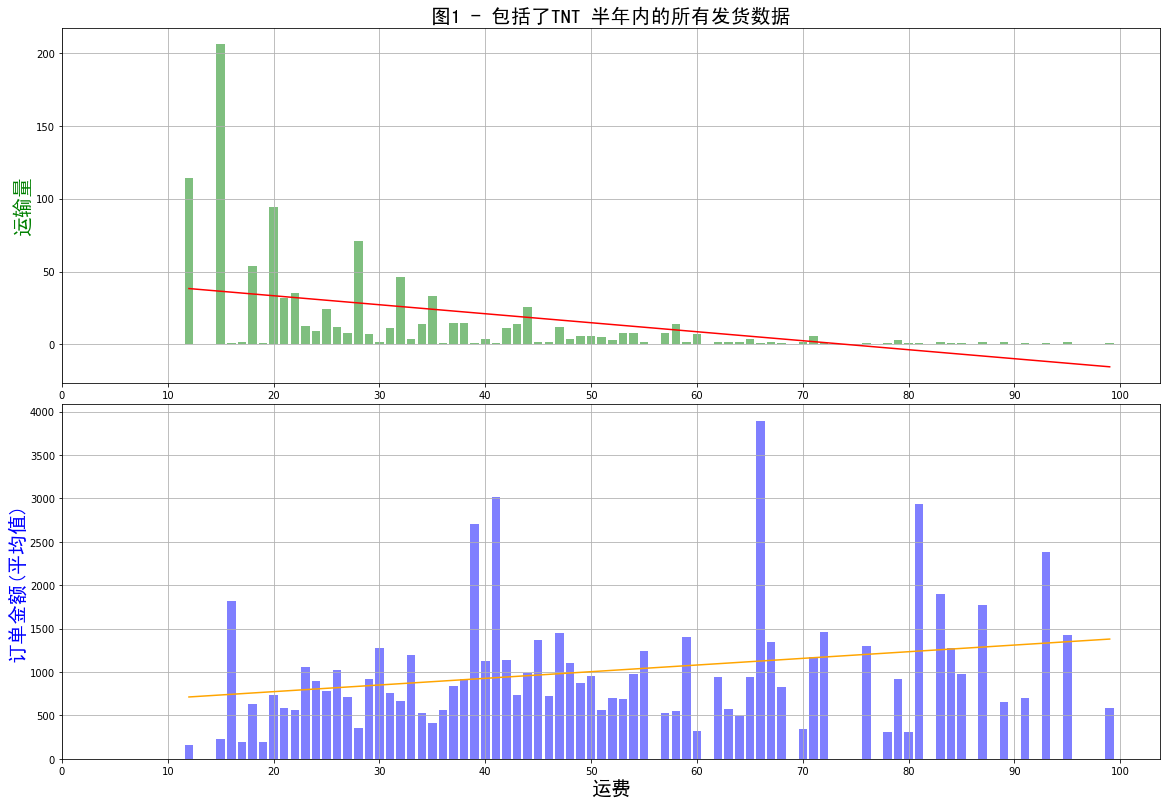

In [394]:
printgraph(TotalAmount_TNT_normal,PriceWithoutGST_AUD_mean_TNT_normal,total_Amount_counts_TNT_normal,"图1 - 包括了TNT 半年内的所有发货数据")

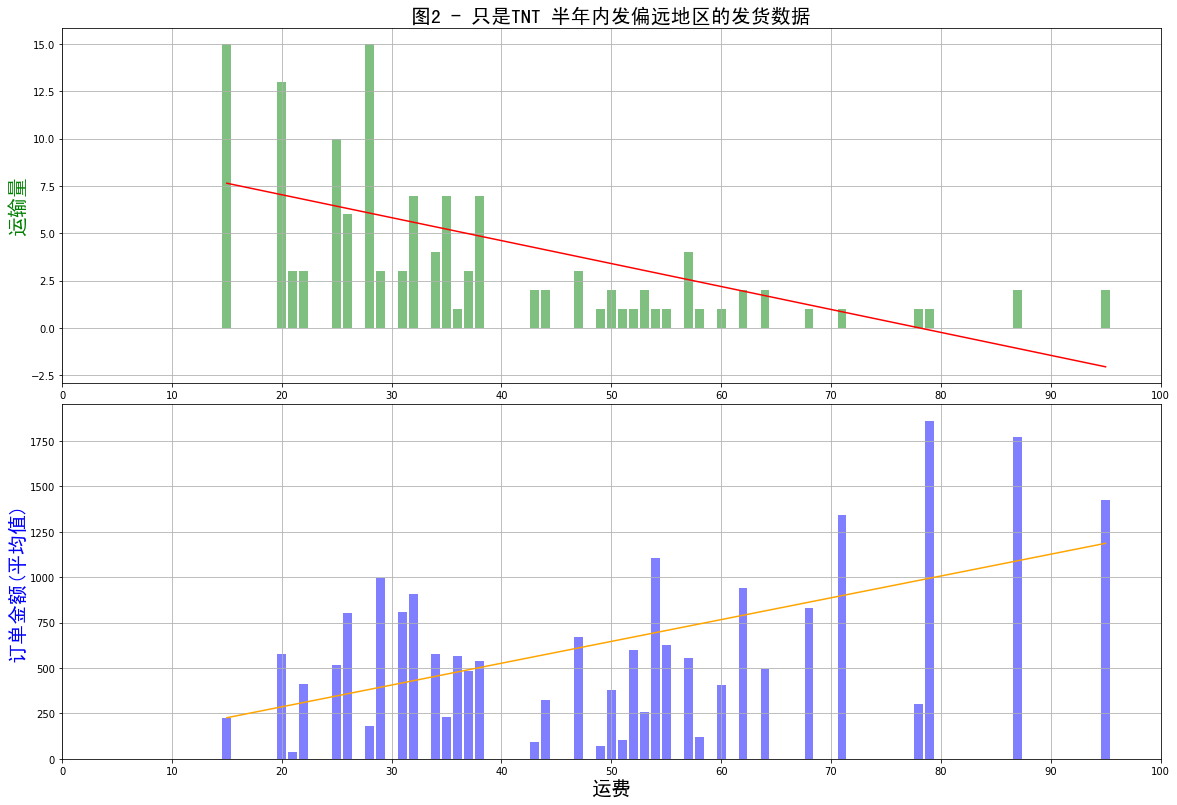

In [395]:
printgraph(TotalAmount_TNT_remote,PriceWithoutGST_AUD_mean_TNT_remote,total_Amount_counts_TNT_remote,"图2 - 只是TNT 半年内发偏远地区的发货数据")

In [396]:
df_startrack = pd.read_excel (r'/content/drive/My Drive/startrack python.xlsx')
df_startrack.shape

(4904, 6)

In [0]:
df_startrack = df_startrack.rename({'Consignment No':'TrackingNumber'}, axis=1)
df_startrack['TrackingNumber'] = df_startrack['TrackingNumber'].astype(str)
table_groupby['TrackingNumber'] = table_groupby['TrackingNumber'].astype(str)

In [0]:
df_startrack_lookup = df_startrack.merge(
                     table_groupby,  
                     on ='TrackingNumber',  
                     how ='left') 

In [399]:
df_startrack_lookup.shape

(4984, 9)

In [0]:
df_startrack_lookup = df_startrack_lookup[df_startrack_lookup['PriceWithoutGST(AUD)'] >= 0]

In [401]:
tempdf = df_startrack_lookup[df_startrack_lookup['PriceWithoutGST(AUD)'].isnull()]
tempdf

,Date,TrackingNumber,cubic weight,weight,Total Amount,Receiver Postcode,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD)


In [402]:
table_groupby.loc[table_groupby['TrackingNumber'] == '5DYZ00008160']

,DeliveryMethod2,OrderNumber,TrackingNumber,PriceWithoutGST(AUD)


In [0]:
df_startrack_lookup['Total Amount'] = df_startrack_lookup['Total Amount'].apply(np.floor)

In [404]:
tempdf = df_startrack_lookup[df_startrack_lookup['Total Amount'] > 50 ]
tempdf = tempdf[tempdf['PriceWithoutGST(AUD)'] < 500 ]
tempdf
#write to excel

,Date,TrackingNumber,cubic weight,weight,Total Amount,Receiver Postcode,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD)
22,3092019,J8PZ50001981,0.092,18,66.0,5032,Startrack,YL20190814003-AU,445.92
23,3092019,J8PZ50001981,0.092,18,66.0,5032,Startrack,YL20190814003-AU2,111.13
1101,30092019,J8PZ50002791,0.060,12,66.0,2166,Startrack,CW20190927221-AU1,102.00
1112,30092019,J8PZ50002820,0.057,11,66.0,2067,Startrack,CW20190917283-AU1,159.00
1404,15102019,J8PZ50003306,0.057,11,66.0,4223,Startrack,CW20191014357-AU1,461.40
1856,17102019,J8PZ50003388,0.071,14,74.0,6225,Startrack,CW20191016246-AU,329.28
1886,23102019,J8PZ50003644,0.060,12,66.0,5000,Startrack,ZQ20191022055-AU,274.80
2078,28102019,J8PZ50003765,0.072,14,66.0,2000,Startrack,CW20191018229-AU2,365.48
2233,4112019,J8PZ50004015,0.063,12,69.0,6800,Startrack,CW20191104037-AU1,470.40
2859,25112019,J8PZ50004721,0.060,12,69.0,5031,Startrack,CW20191112346-AU2,96.58


In [0]:
tempdf.to_csv(r'/content/drive/My Drive/startrack odd.csv',index = False, header=True)

In [0]:
odd = ['YL20190814003-AU','YL20190814003-AU2','CW20190927221-AU1','CW20190917283-AU1','CW20191014357-AU1',
'CW20191016246-AU','ZQ20191022055-AU','CW20191018229-AU2','CW20191104037-AU1','CW20191112346-AU2','CW20191113290-AU1',
'CW201912160055-AU1','CW201912160151-AU','CW202001070449-AU1','CW202001080572-AU1','CW201912200418-AU2','CW202001130095-AU1',
'CW202001160392-AU1','CW202001140530-AU1','CW202001160515-AU1','CW202001170407-AU','CW20190902214-AU1','CW20190906226-AU1'
]
for i in odd:
  df_startrack_lookup = df_startrack_lookup[df_startrack_lookup['OrderNumber'] != i]


In [407]:
df_startrack_lookup_withremote = df_startrack_lookup.merge(
                     df_remote,  
                     on ='Receiver Postcode',  
                     how ='left') 
df_startrack_lookup_withremote['remote_yes'].value_counts(dropna=False)

NaN    4045
Y       703
Name: remote_yes, dtype: int64

In [408]:
df_startrack_lookup_remoteonly = df_startrack_lookup_withremote[df_startrack_lookup_withremote['remote_yes'] == 'Y']
df_startrack_lookup_remoteonly.head(3)

,Date,TrackingNumber,cubic weight,weight,Total Amount,Receiver Postcode,DeliveryMethod2,OrderNumber,PriceWithoutGST(AUD),remote_yes
27,30082019,J8PZ50001834,0.010,2,9.0,4306,Startrack,CW20190829434-AU1,874.03,Y
35,2092019,J8PZ50001885,0.001,1,8.0,4520,Startrack,CW20190902022-AU1,69.80,Y
41,2092019,J8PZ50001933,0.010,2,9.0,4306,Startrack,CW20190829434-AU2,188.97,Y


In [0]:
df_startrack_lookup_groupby_remoteonly = groupByTotalAmountCount(df_startrack_lookup_remoteonly)
df_startrack_lookup_groupby_withremote = groupByTotalAmountCount(df_startrack_lookup_withremote)

In [0]:
TotalAmount_startrack_normal,PriceWithoutGST_AUD_mean_startrack_normal,total_Amount_counts_startrack_normal = preparegraphseries(df_startrack_lookup_groupby_withremote)
TotalAmount_startrack_remote,PriceWithoutGST_AUD_mean_startrack_remote,total_Amount_counts_startrack_remote = preparegraphseries(df_startrack_lookup_groupby_remoteonly)

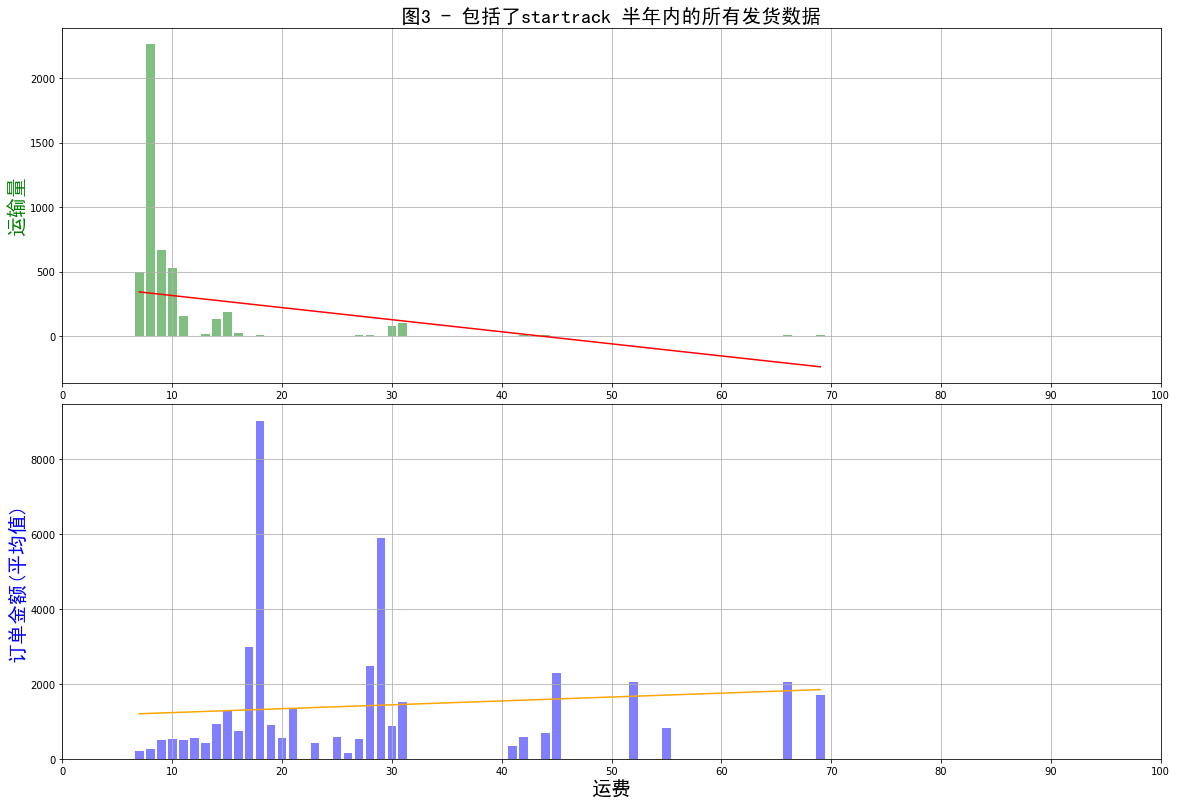

In [411]:
printgraph(TotalAmount_startrack_normal,PriceWithoutGST_AUD_mean_startrack_normal,total_Amount_counts_startrack_normal,'图3 - 包括了startrack 半年内的所有发货数据')

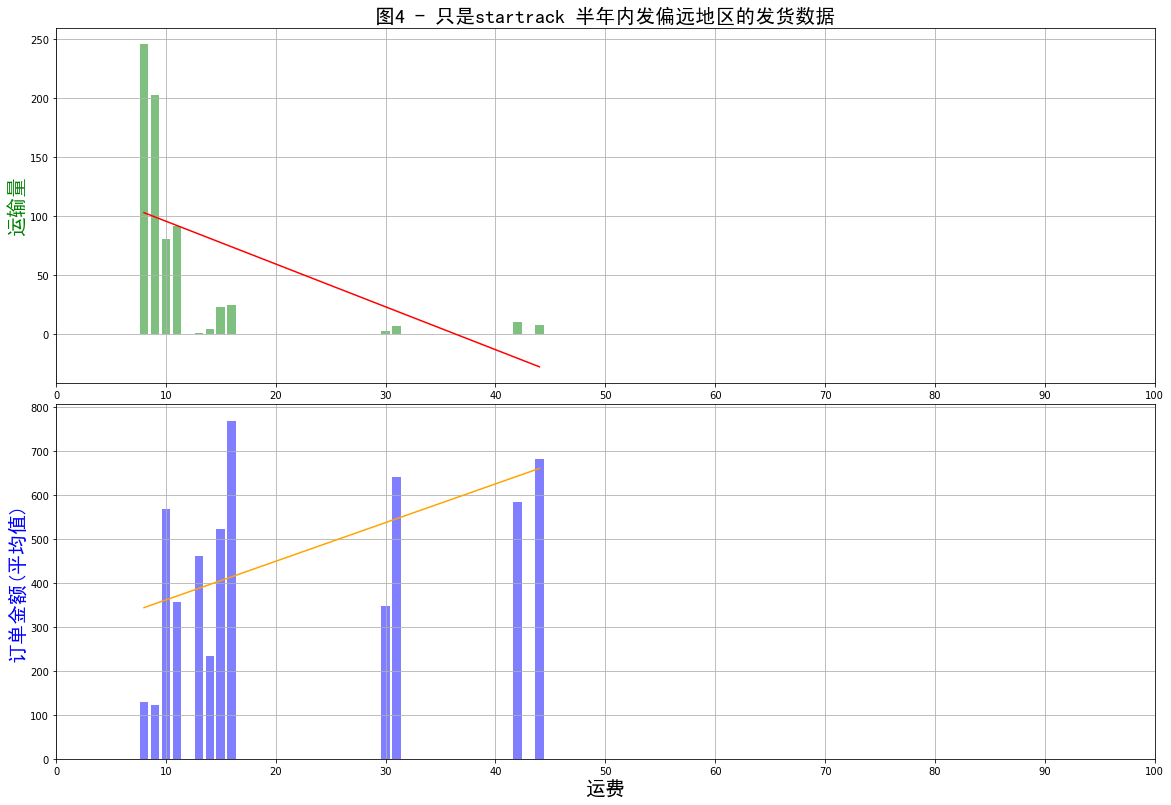

In [412]:
printgraph(TotalAmount_startrack_remote,PriceWithoutGST_AUD_mean_startrack_remote,total_Amount_counts_startrack_remote,'图4 - 只是startrack 半年内发偏远地区的发货数据')